In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

# LogisticRegression --> for classification model

In [2]:
df_yellow = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet')
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')

In [4]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [5]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [9]:
df.loc[:, 'duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).apply(lambda x: x.total_seconds() / 60)
# df['duration']=df.lpep_dropoff_datetime - df.lpep_pickup_datetime 
# df.duration = df.duration.apply(lambda x:x.total_seconds()/60)

In [7]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,...,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00,0.066667


/tmp/ipykernel_1747/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

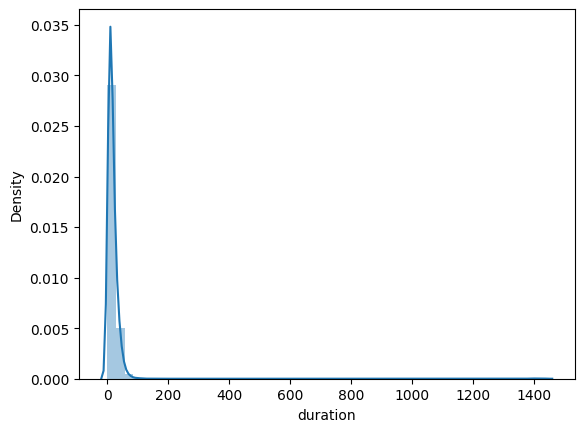

In [8]:
sns.distplot(df.duration)

In [9]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [5]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [13]:
def table_info(df):
    print(f"Dataset Shape: {df.shape}")
    first_check = pd.DataFrame(df.dtypes,columns=['dtypes'])
    first_check = first_check.reset_index()
    first_check['Name'] = first_check['index']
    first_check = first_check[['Name','dtypes']]
    first_check['isnull'] = df.isnull().sum().values    
    first_check['num_Uniques'] = df.nunique().values
    first_check['First Value'] = df.loc[0].values
    return first_check

table_info(df)

Dataset Shape: (73908, 21)


,Name,dtypes,isnull,num_Uniques,First Value
0,VendorID,int64,0,2,2
1,lpep_pickup_datetime,datetime64[us],0,56331,2021-01-01 00:15:56
2,lpep_dropoff_datetime,datetime64[us],0,56402,2021-01-01 00:19:52
3,store_and_fwd_flag,object,35733,2,N
4,RatecodeID,float64,35733,5,1.0
5,PULocationID,int64,0,250,43
6,DOLocationID,int64,0,256,151
7,passenger_count,float64,35733,7,1.0
8,trip_distance,float64,0,2794,1.01
9,fare_amount,float64,0,3277,5.5


In [6]:
categorical = ['PULocationID' , 'DOLocationID']
numerical = ['trip_distance'] 

In [10]:
df.loc[:, categorical] = df[categorical].astype(str)

In [11]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [12]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts) # one-hot encoding 

In [13]:
traget = 'duration'
y_train = df[traget].values

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_perd = lr.predict(X_train)

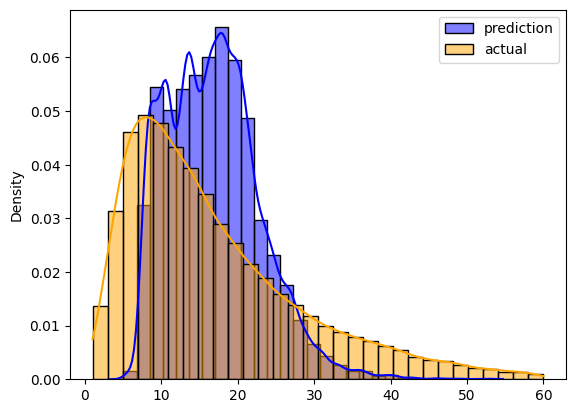

In [16]:
sns.histplot(y_perd, label='prediction', kde=True, stat='density', color='blue', bins=30)
sns.histplot(y_train, label='actual', kde=True, stat='density', color='orange', bins=30)

plt.legend()
plt.show()


In [19]:
mean_squared_error(y_train, y_perd, squared=False)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(9.838799799829577)

In [20]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_train, y_perd)

np.float64(9.838799799829577)

saving the model into logs file as models registry

In [21]:
import pickle
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump(lr, f_out)

loading the logs

In [29]:
from joblib import load

model = load('models/lin_reg.bin')
print(model)


LinearRegression()
